<a href="https://colab.research.google.com/github/monclai/bootcamp_dataScience_aplicada_alura_desafios/blob/main/desafio_01/notebook/An%C3%A1lise_explorat%C3%B3ria_das_interna%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória das internações em um âmbito top-down.

## Introdução

Com objetivo de se ter uma visão ampla, foi realizada a coleta inicial dos dados de cada região do Brasil.

Os dados tem a presença do número de internações por ano em cada região, com isso permitindo observar movimentações gerais das internações.

Tais dados foram coletados no site [tabnet - datasus](http://tabnet.datasus.gov.br/).

In [233]:
import pandas as pd

In [234]:
uri_internacao_por_regiao_ano = 'https://raw.githubusercontent.com/monclai/bootcamp_dataScience_aplicada_alura_desafios/main/desafio_01/dados/internacao_por_regiao_por_ano.csv'

dt_internacao_reg_ano = pd.read_csv(uri_internacao_por_regiao_ano, sep=';', skiprows=3, skipfooter=11, engine='python')

dt_internacao_reg_ano = dt_internacao_reg_ano.set_index("Região")

dt_internacao_reg_ano

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Total
Região,,,,,,,,,,,,,,,
1 Região Norte,945632,992653,1011174,1001176,973631,1001866,981965,953750,941077,966571,992967,1015912,896394,199250,12874018
2 Região Nordeste,3016562,3134816,3211310,3166990,3044964,3052710,3059136,3076448,3026220,3072343,3183806,3265487,2758435,672879,40742106
3 Região Sudeste,4094612,4226450,4342659,4382524,4332845,4348944,4452977,4490327,4447764,4502335,4644696,4797859,4190282,1060258,58314532
4 Região Sul,1812052,1887681,1891360,1861977,1888922,1907189,1953406,1982321,2011678,2049378,2099036,2157463,1831117,455088,25788668
5 Região Centro-Oeste,874745,887209,901462,868904,852227,886451,872803,874870,870329,879234,896136,945005,836994,204153,11650522
Total,10743603,11128809,11357965,11281571,11092589,11197160,11320287,11377716,11297068,11469861,11816641,12181726,10513222,2591628,149369846


## Ajustes

Como nosso objetivo é apenas analisar inicialmente os dados, foi necessário a remoção das linhas e colunas referente ao total.

Também foi feito a remoção dos anos de 2008, 2009 e 2021, dessa forma gerando uma visão das internações entre 2010 e 2020.

In [235]:
dt_internacao_reg_ano_usaveis = dt_internacao_reg_ano.drop("Total", axis=0)

In [236]:
dt_internacao_reg_ano_usaveis = dt_internacao_reg_ano_usaveis.drop("Total", axis=1)

In [237]:
dt_internacao_reg_ano_usaveis = dt_internacao_reg_ano_usaveis.drop('2008', axis = 1)
dt_internacao_reg_ano_usaveis = dt_internacao_reg_ano_usaveis.drop('2009', axis = 1)
dt_internacao_reg_ano_usaveis = dt_internacao_reg_ano_usaveis.drop('2021', axis = 1)

## Análise gráfica

Apartir do gráfico podemos ter uma visão clara do número de internações por região, também vemos que no ano de 2019 há um pico no número de internações em todas as regiões; também pode ser observado que a região Sul tem um leve crescimento, contudo linear das internações; e também podemos ver a movimentação muito próxima das internações na região Norte e Centro-Oeste.

Através dessas observações podemos ver que é interessante a proximidade do crescimento das curvas da região Norte e Centro-Oeste, dessa forma indicando a necessidade de maiores investigações.

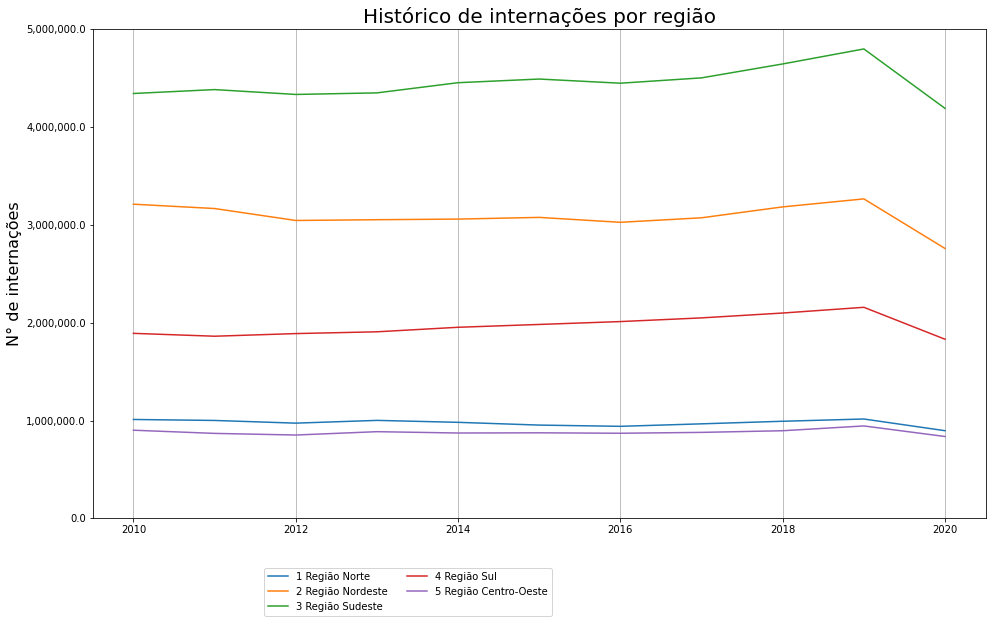

In [238]:
ax = dt_internacao_reg_ano_usaveis.T.plot(figsize = (16, 9))
plt.legend(loc = 5, bbox_to_anchor = (0.52, -0.15), ncol = 2)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,}"))
plt.ylim(0, 5000000)
ax.set_ylabel("N° de internações", fontsize = 16)
plt.title("Histórico de internações por região", fontsize = 20)
plt.grid(axis='x')
plt.show()

## Visão aproximida da região Norte e Centro-Oeste

Olhando uma visão aproximada do Norte e Centro-Oeste ainda em relação aos anos podemos ver uma reconfirmação do gráfico anterior com uma movimentação de número de internações similar nas regiões, entretanto pelo período de tempo esparso podemos ter informações mais interessantes observando de forma mais detalhada cada região.

In [239]:
dt_Norte_Centro_oeste = dt_internacao_reg_ano_usaveis.loc[['1 Região Norte', '5 Região Centro-Oeste']]

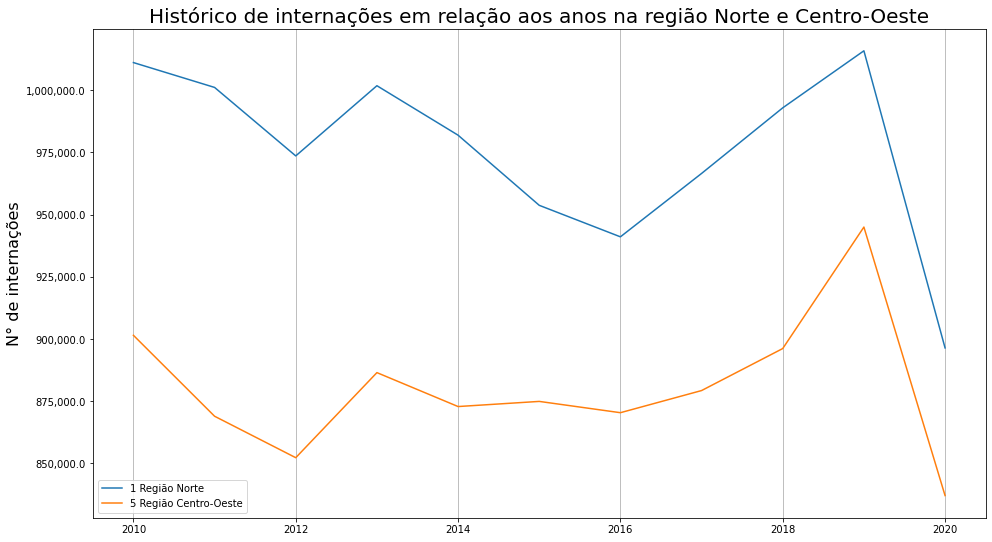

In [240]:
ax = dt_Norte_Centro_oeste.T.plot(figsize = (16, 9))
plt.legend(loc = 'lower left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,}"))
ax.set_ylabel("N° de internações", fontsize = 16)
plt.title("Histórico de internações em relação aos anos na região Norte e Centro-Oeste", fontsize = 20)
plt.grid(axis='x')
plt.show()

## Análise aproximada - regiões Norte e Centro-Oeste

Com o objetivo de obter mais detalhes sobre o avanço das internações nas regiões Norte e Centro-Oeste, foi buscado novamente dados no [tabnet - datasus](http://tabnet.datasus.gov.br/) entretando de forma mais detalhada, com dados temporais de mês e ano entre 2010 e 2020.

In [241]:
uri_intern_centro_oeste_norte = 'https://raw.githubusercontent.com/monclai/bootcamp_dataScience_aplicada_alura_desafios/main/desafio_01/dados/internacao_ano_mes_centro_oeste_norte.csv'


dt_internacao_centro_oeste_norte = pd.read_csv(uri_intern_centro_oeste_norte, encoding="ISO-8859-1", sep=';', skiprows=4, skipfooter=11, engine='python')

dt_internacao_centro_oeste_norte = dt_internacao_centro_oeste_norte.set_index("Região")

In [242]:
dt_internacao_centro_oeste_norte_usavel = dt_internacao_centro_oeste_norte.drop('Total', axis=0)

In [243]:
dt_internacao_centro_oeste_norte_usavel = dt_internacao_centro_oeste_norte_usavel.drop('Total', axis=1)

In [244]:
dt_internacao_centro_oeste_norte_usavel

,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,2011/Dez,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Região,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1 Região Norte,83935,82200,85459,85457,88344,85459,84637,82228,84099,84412,83661,81283,85246,82110,84474,85285,82560,84994,82796,80219,84698,81846,82388,84560,82249,80516,85776,84548,86562,85190,82125,73569,80416,79659,78261,74760,79076,81005,85564,86481,...,83918,84289,80871,80359,80946,78970,82247,83222,82929,84083,82759,84893,84068,87853,81990,79007,81316,79907,83466,84959,87835,84827,84707,84768,88232,87885,85012,82998,85158,83640,81950,65868,66224,68351,72869,77850,75839,76915,72189,69541
5 Região Centro-Oeste,75411,73555,78936,77151,78775,74565,74411,75802,75984,73901,73403,69568,71807,70854,76231,77299,75030,72238,72595,70675,73905,70804,69082,68384,67664,69303,72348,74496,72490,72617,71902,73777,71948,71093,68400,66189,70113,72646,75541,77233,...,74588,75155,72983,70277,72508,71045,75886,75290,78386,78433,78781,77118,76154,73111,70725,68699,74538,73728,79604,79537,82365,79015,81864,84600,78498,80605,75497,75154,77574,76840,78761,67323,65776,63646,65891,68621,66596,70348,67540,68078


## Análise gráfica - Norte e Centro-Oeste

Com o gráfico mais rico em informações, provenientes de número de internações a cada mês, podemos observar uma reafirmação do que a visão inicial indicava, as duas regiões tem movimentações de internações similares, ficando mais evidente nos vales e nos picos.

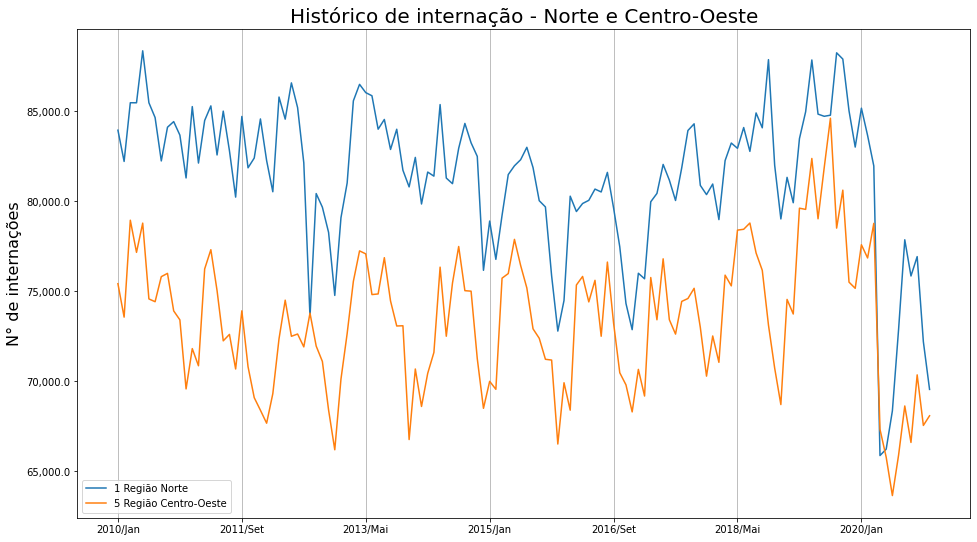

In [245]:
ax = dt_internacao_centro_oeste_norte_usavel.T.plot(figsize = (16,9))

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,}"))
plt.title("Histórico de internação - Norte e Centro-Oeste", fontsize = 20)
ax.set_ylabel("N° de internações", fontsize = 16)
plt.grid(axis='x')

plt.legend(loc = 'lower left')
plt.show()

## Conclusão

Podemos ver com essa análise exploratória simples a similaridade da curva de internações entre as regiões Norte e Centro-Oeste, tal proximidade fica evidente no picos e vales.

Dessa forma percebemos que apesar da diferença territorial, populacional e climática entre as duas regiões há algum fator que gere o movimento de internações similar no qual seria interessante realizar uma busca mais aprofundada para encontrar tais fatores.